In [1]:
# Script para obtener los tamaños de las regiones del dataset

In [2]:
import os 
import numpy as np
from util_loads import loadMask
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
%matplotlib inline 


In [3]:
layer_dataset = './dataset/MASKS/'
file_list = [layer_dataset + x for x in os.listdir(layer_dataset) if not x.startswith('.') and 'jupyter' not in x.lower()]

Mean:  113.98232591349341
Median:  107.0
Skewness:  1.557027572000735
Kurtosis:  5.085794528126591
Mode:  86
Std:  42.40650562869578
Std x1.5:  63.609758443043674
52.0
78.0
65.0
Median + std:  170.6097584430437
Median - std:  43.390241556956326
IQR + std15:  185.0
IQR - std15:  29.0
IQR + std125:  172.0
IQR - std125:  42.0


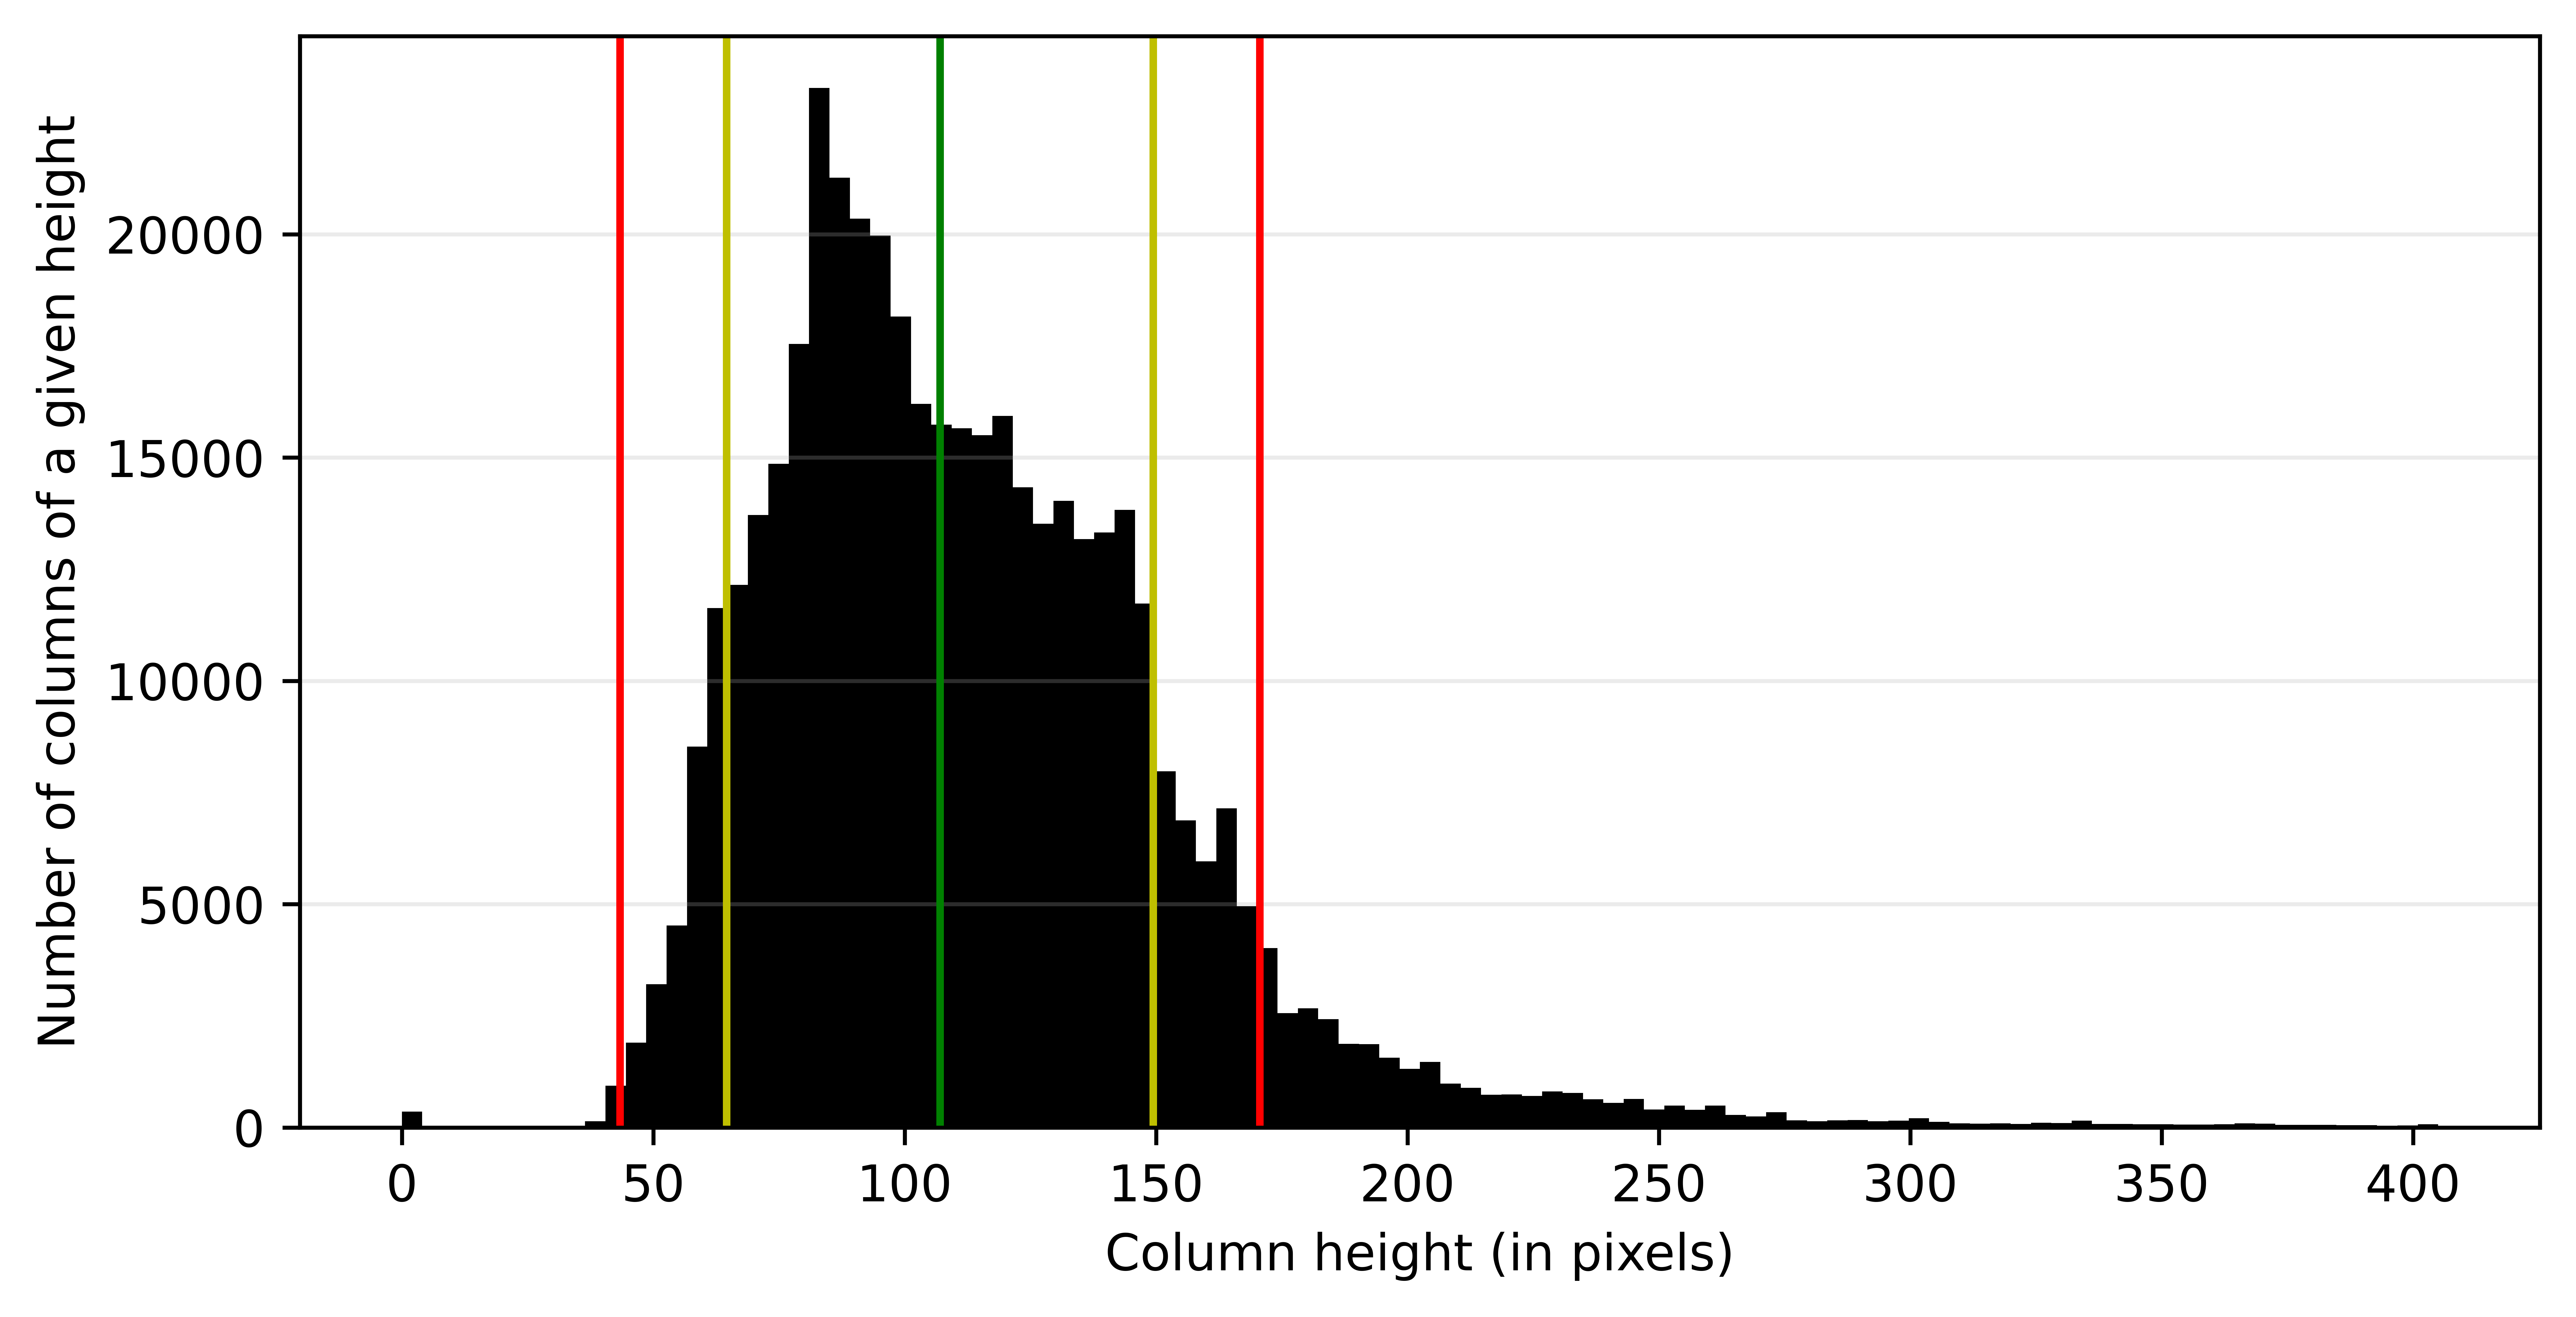

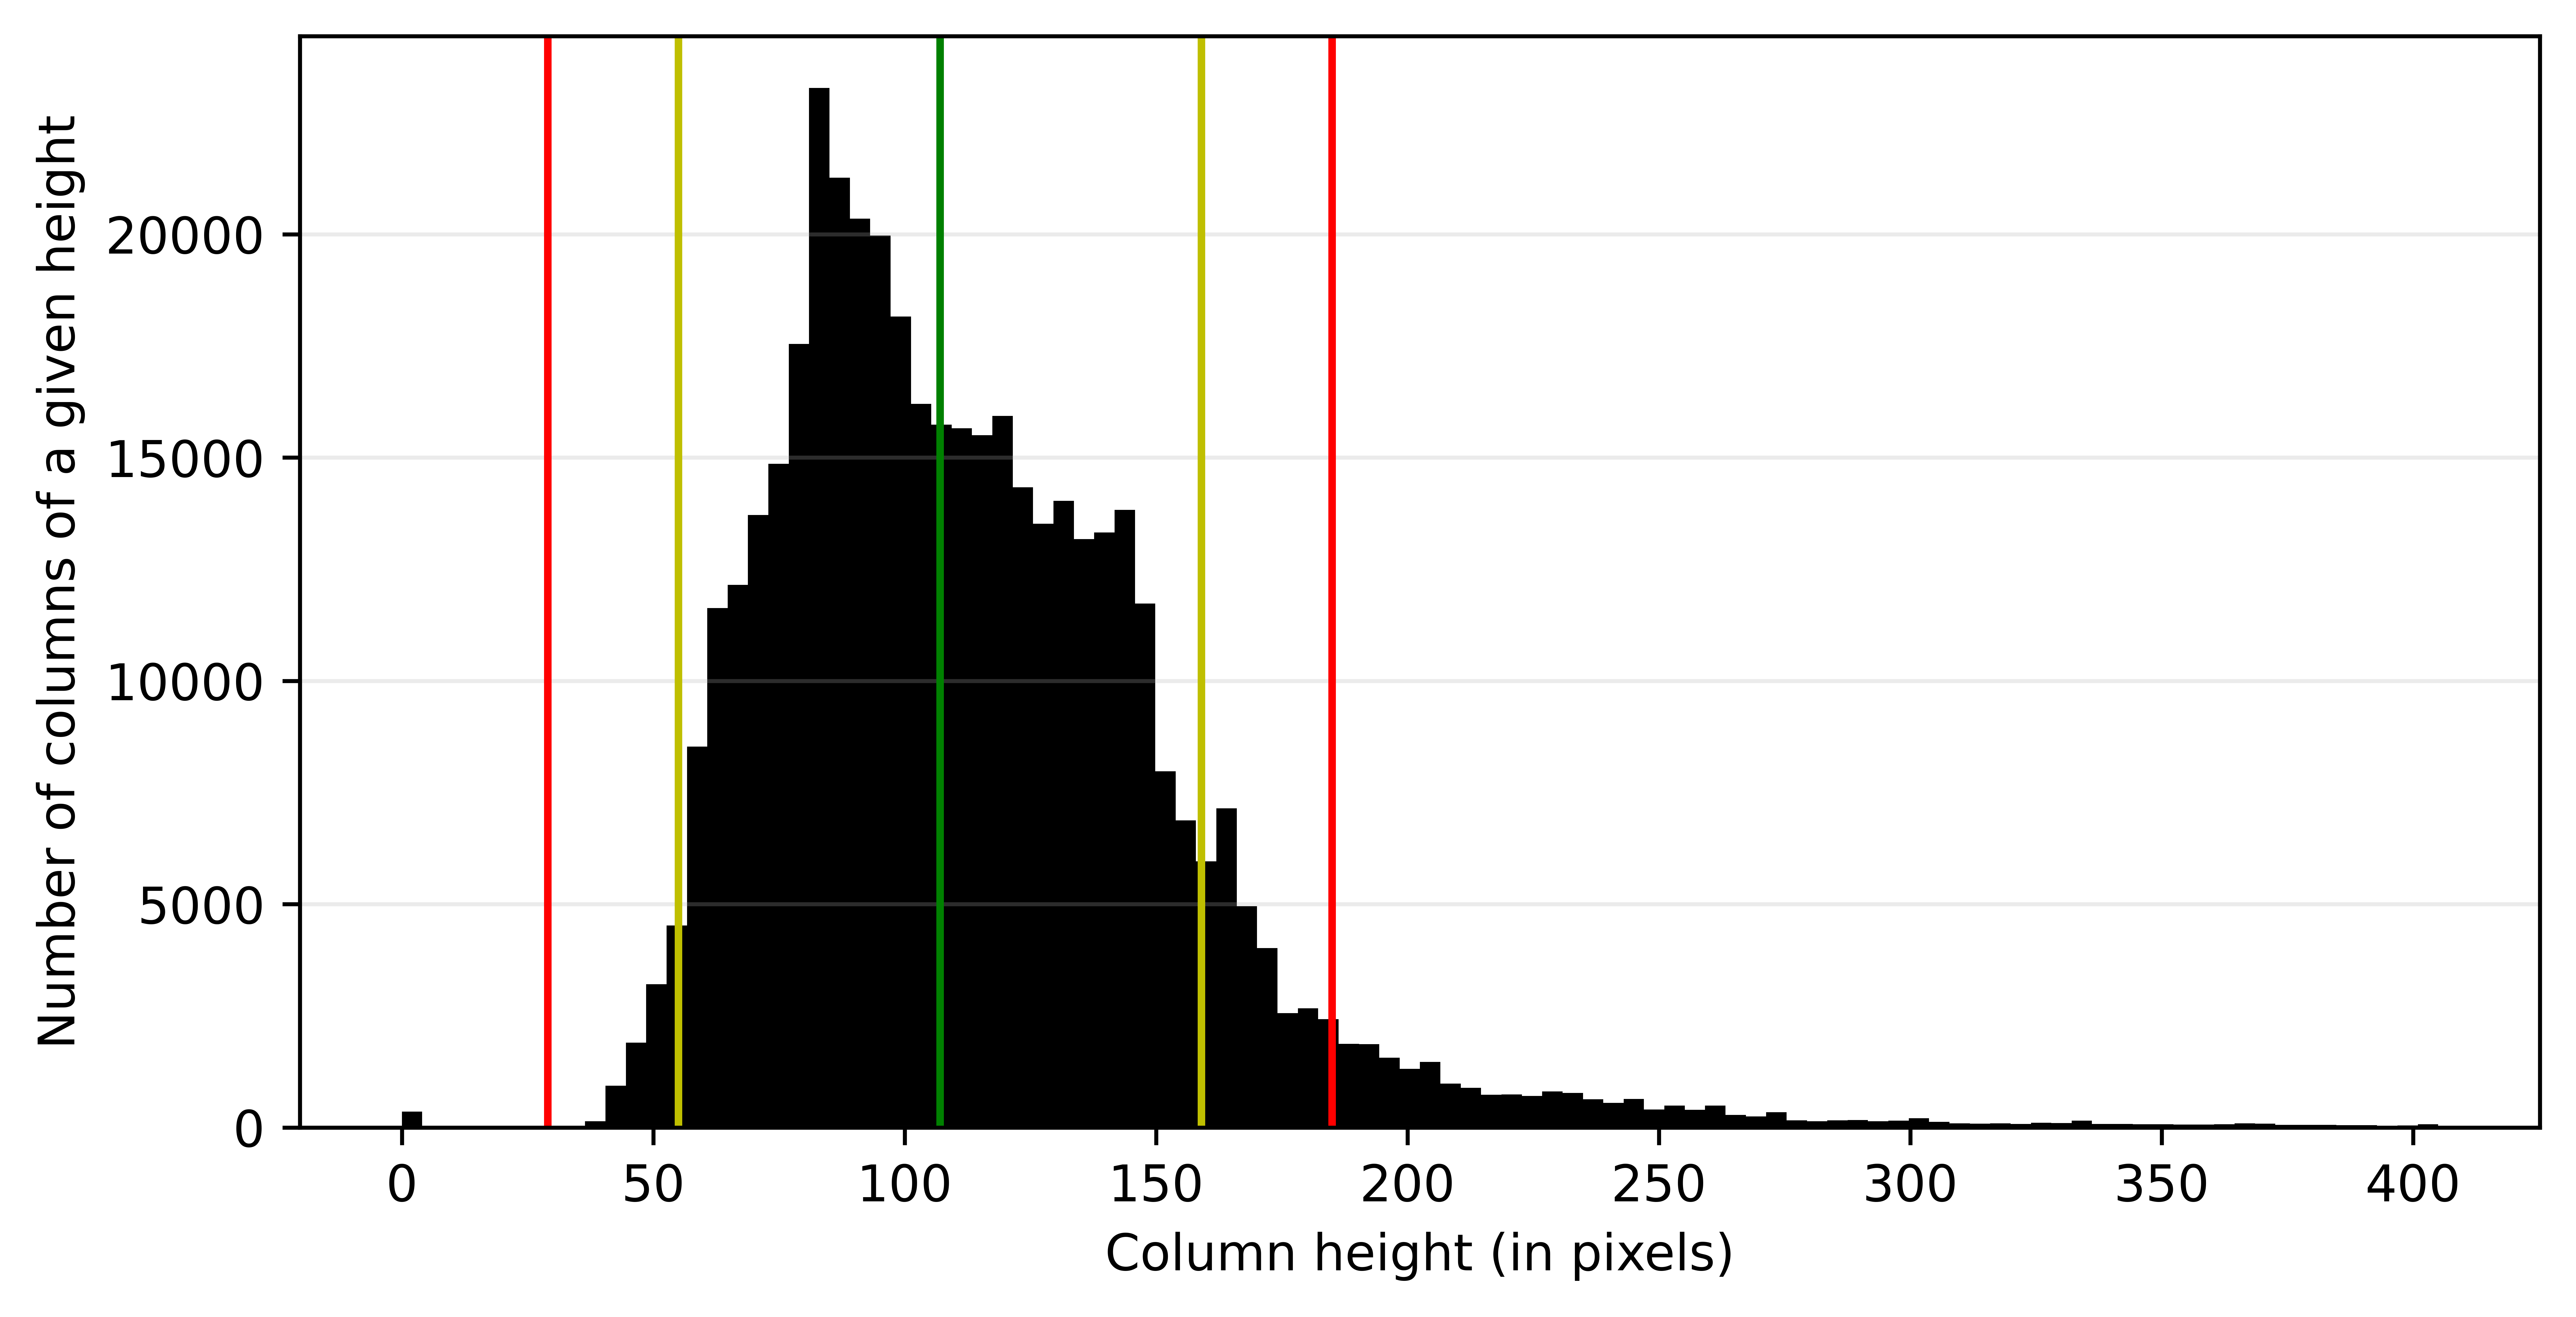

In [4]:

total_col_len = []
for x in file_list:
    current_mask = loadMask(x)
    # Sumamos en vertical, dándonos la longitud de cada fila
    total_col_len += list(np.sum(current_mask, axis=0))
    
total_col_len = np.array(total_col_len)


figure(figsize=(8, 4), dpi=1200)
print('Mean: ', np.mean(total_col_len))
print('Median: ', np.median(total_col_len))
print('Skewness: ', skew(total_col_len))
print('Kurtosis: ', kurtosis(total_col_len))
print('Mode: ', stats.mode(total_col_len)[0][0])
print('Std: ', np.std(total_col_len))
print('Std x1.5: ', np.std(total_col_len)*1.5)
q3, q1 = np.percentile(total_col_len, [75 ,25])
iqr = q3 - q1

print(iqr)
print(iqr*1.5)
print(iqr*1.25)

print('Median + std: ',np.median(total_col_len)+np.std(total_col_len)*1.5)
print('Median - std: ',np.median(total_col_len)-np.std(total_col_len)*1.5)
print('IQR + std15: ',np.median(total_col_len)+iqr*1.5)
print('IQR - std15: ',np.median(total_col_len)-iqr*1.5)
print('IQR + std125: ',np.median(total_col_len)+iqr*1.25)
print('IQR - std125: ',np.median(total_col_len)-iqr*1.25)
plt.hist(total_col_len,bins=100,color='k',histtype='stepfilled')
#plt.hist(total_col_len,bins=100,color='silver',histtype='stepfilled')
plt.axvline(np.median(total_col_len),color='g')
plt.axvline(np.median(total_col_len) + np.std(total_col_len)*1.5,color='r')
plt.axvline(np.median(total_col_len) - np.std(total_col_len)*1.5,color='r')
plt.axvline(np.median(total_col_len) + np.std(total_col_len),color='y')
plt.axvline(np.median(total_col_len) - np.std(total_col_len),color='y')

ax1 = plt.gca()
ax1.grid(which='both',alpha=0.25,axis='y')
ax1.set_xlabel('Column height (in pixels)')
ax1.set_ylabel('Number of columns of a given height')
plt.savefig('columnplot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait',  format=None,
        transparent=True, bbox_inches=None, pad_inches=0,
         metadata=None)
plt.show()
figure(figsize=(8, 4), dpi=1200)

plt.hist(total_col_len,bins=100,color='k',histtype='stepfilled')
#plt.hist(total_col_len,bins=100,color='silver',histtype='stepfilled')
plt.axvline(np.median(total_col_len),color='g')
plt.axvline(np.median(total_col_len) + iqr*1.5,color='r')
plt.axvline(np.median(total_col_len) - iqr*1.5,color='r')
plt.axvline(np.median(total_col_len) + iqr,color='y')
plt.axvline(np.median(total_col_len) - iqr,color='y')

ax1 = plt.gca()
ax1.grid(which='both',alpha=0.25,axis='y')
ax1.set_xlabel('Column height (in pixels)')
ax1.set_ylabel('Number of columns of a given height')
plt.savefig('columnplot_iqr.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait',  format=None,
        transparent=True, bbox_inches=None, pad_inches=0,
         metadata=None)
plt.show()

